QuickDraw Dataset 준비 및 탐색
1. 필요한 라이브러리 임포트

In [1]:
import numpy as np
import requests
import os
from tqdm import tqdm
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def download_quickdraw_data(class_name, save_dir='dataset'):
    """QuickDraw 데이터셋의 특정 클래스 다운로드"""
    os.makedirs(save_dir, exist_ok=True)
    
    filename = f"{class_name}.npy"
    url = f"https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/{filename}"
    save_path = os.path.join(save_dir, filename)
    
    if os.path.exists(save_path):
        print(f"File {filename} already exists")
        return save_path
        
    print(f"Downloading {filename}...")
    response = requests.get(url, stream=True)
    total_size = int(response.headers.get('content-length', 0))
    
    with open(save_path, 'wb') as file, tqdm(
        total=total_size,
        unit='iB',
        unit_scale=True
    ) as pbar:
        for data in response.iter_content(chunk_size=1024):
            size = file.write(data)
            pbar.update(size)
    
    return save_path

selected_classes = [
    'circle',        # 단순한 원
    'triangle',      # 삼각형
    'square',        # 사각형
    'donut',         # 초승달
    'house',      # 마름모
    'cloud',      # 팔각형
    'lightning',    # 번개
    'star',         # 별
    'diamond',      # 육각형
    'banana'          # 직선
]

# 각 클래스 다운로드
class_files = []
for class_name in selected_classes:
    file_path = download_quickdraw_data(class_name)
    class_files.append(file_path)

File circle.npy already exists
File triangle.npy already exists
File square.npy already exists
File donut.npy already exists
File house.npy already exists
File cloud.npy already exists
File lightning.npy already exists
File star.npy already exists
File diamond.npy already exists
File banana.npy already exists


In [3]:
def create_dataset(class_files, classes, samples_per_class=5000):
    """균형잡힌 데이터셋 생성"""
    processed_data = []
    processed_labels = []
    
    for idx, (file_path, class_name) in enumerate(zip(class_files, classes)):
        # 데이터 로드 (allow_pickle=True 추가)
        data = np.load(file_path, allow_pickle=True)
        
        # 샘플 선택
        if len(data) > samples_per_class:
            indices = np.random.choice(len(data), samples_per_class, replace=False)
            data = data[indices]
        
        # 정규화 및 reshape
        data = data.astype(np.float32) / 255.0
        data = data.reshape(-1, 28, 28)  # 명시적으로 28x28 형태로 reshape
        
        processed_data.append(data)
        processed_labels.extend([idx] * len(data))
        
        print(f"Processed {class_name}: {len(data)} samples")
    
    # 데이터 합치기
    final_data = np.concatenate(processed_data, axis=0)
    final_labels = np.array(processed_labels)
    
    # 데이터셋 저장
    np.savez(
        'quickdraw_dataset.npz',
        data=final_data,
        labels=final_labels,
        classes=classes
    )
    
    return final_data, final_labels

# 각 클래스 다운로드
class_files = []
for class_name in selected_classes:
    file_path = download_quickdraw_data(class_name)
    class_files.append(file_path)

# 데이터셋 생성
data, labels = create_dataset(class_files, selected_classes)

File circle.npy already exists
File triangle.npy already exists
File square.npy already exists
File donut.npy already exists
File house.npy already exists
File cloud.npy already exists
File lightning.npy already exists
File star.npy already exists
File diamond.npy already exists
File banana.npy already exists
Processed circle: 5000 samples
Processed triangle: 5000 samples
Processed square: 5000 samples
Processed donut: 5000 samples
Processed house: 5000 samples
Processed cloud: 5000 samples
Processed lightning: 5000 samples
Processed star: 5000 samples
Processed diamond: 5000 samples
Processed banana: 5000 samples


데이터셋 정보:
데이터 형태: (50000, 28, 28)
레이블 형태: (50000,)


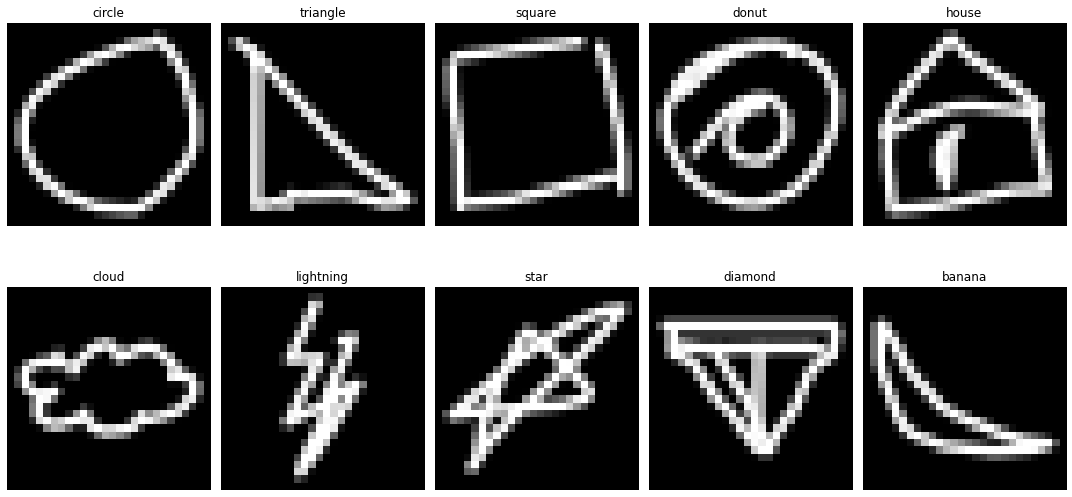

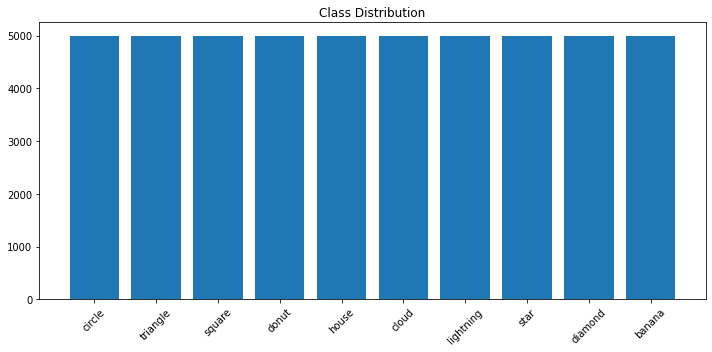

In [4]:
print("데이터셋 정보:")
print(f"데이터 형태: {data.shape}")  # (N, 28, 28)
print(f"레이블 형태: {labels.shape}")  # (N,)

# 각 클래스별 샘플 시각화
plt.figure(figsize=(15, 8))
for i in range(10):
    plt.subplot(2, 5, i+1)
    idx = np.where(labels == i)[0 ][0]
    plt.imshow(data[idx], cmap='gray')
    plt.title(selected_classes[i])
    plt.axis('off')
plt.tight_layout()
plt.show()

# 데이터셋의 클래스별 분포 확인
unique, counts = np.unique(labels, return_counts=True)
plt.figure(figsize=(10, 5))
plt.bar(selected_classes, counts)
plt.title('Class Distribution')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()